In [3]:
from fastai.vision.all import *

Using fastai tutorial : https://docs.fast.ai/tutorial.vision.html 

In [4]:
path =  untar_data(URLs.PETS)

In [5]:
path.ls()

(#3) [Path('C:/Users/scastaneda/.fastai/data/oxford-iiit-pet/annotations'),Path('C:/Users/scastaneda/.fastai/data/oxford-iiit-pet/images'),Path('C:/Users/scastaneda/.fastai/data/oxford-iiit-pet/models')]

In [6]:
files = get_image_files(path/"images")
len(files)

7390

To know which photos are dogs/cats we need to know which files are labeled dog and cats (lowercase letter = dogs, uppercase = cats)

In [7]:
files[0], files[6]

(Path('C:/Users/scastaneda/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),
 Path('C:/Users/scastaneda/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg'))

In [8]:
def label_func(f) : return f[0].isupper()

^Easy label function

In [9]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms = Resize(224))

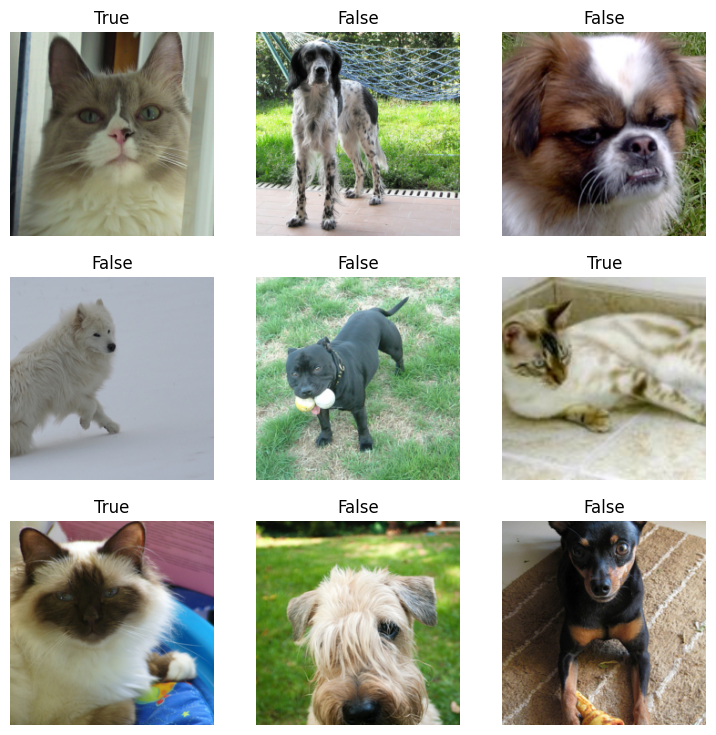

In [10]:
dls.show_batch()

In [11]:
learn = vision_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.152443,0.020888,0.006766,06:18


epoch,train_loss,valid_loss,error_rate,time
0,0.065930,0.016601,0.006089,08:08


In [12]:
learn.predict(files[0])

('True', tensor(1), tensor([2.9783e-05, 9.9997e-01]))

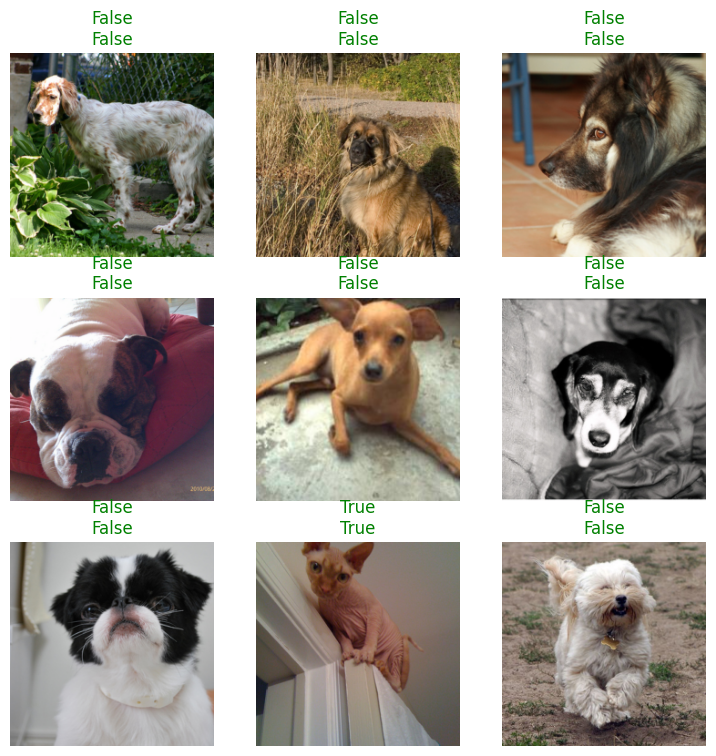

In [13]:
learn.show_results()

In [14]:
files[0].name

'Abyssinian_1.jpg'

To see breed name we need to see the actual file name which is ran above.

So everything we need is before the last _. To grab the name we run the expression:

In [15]:
pat = r'^(.*)_\d+.jpg'

In [16]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

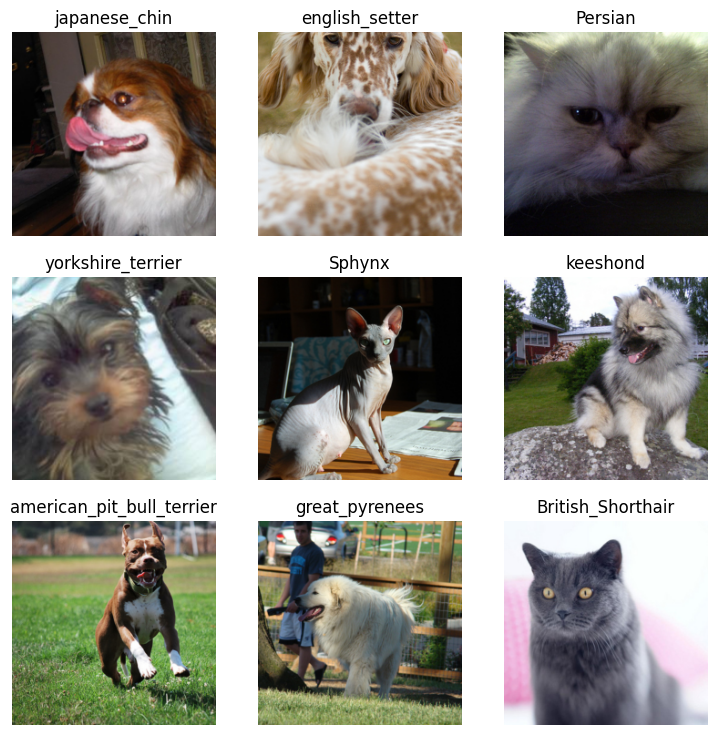

In [17]:
dls.show_batch()

In [18]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
  batch_tfms=aug_transforms(size=224))

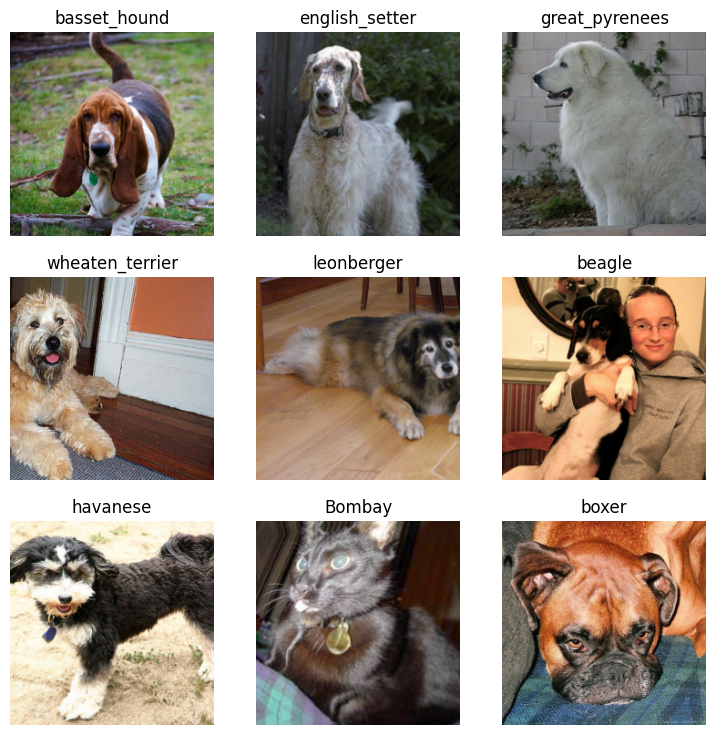

In [19]:
dls.show_batch()

In [20]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

Make the Learner

SuggestedLRs(valley=0.0012022644514217973)

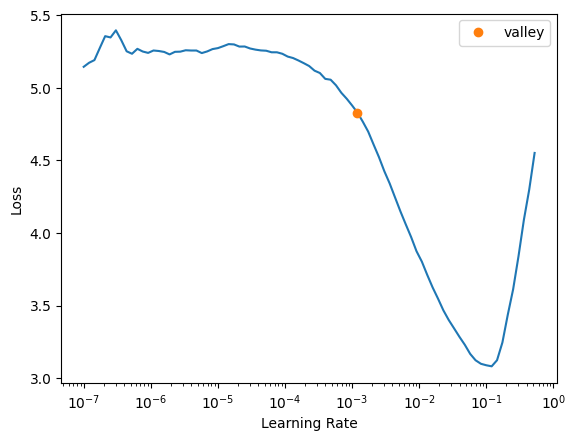

In [21]:
learn.lr_find()

In [22]:
learn.fine_tune(2, 3e-3)

epoch,train_loss,valid_loss,error_rate,time


This is fine tuning the learning rate

In [ ]:
learn.show_results()

In [ ]:
interp = Interpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize = (15,10))